--- Informasi Awal Dataset ---
5 Baris Pertama Data:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Info Kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  

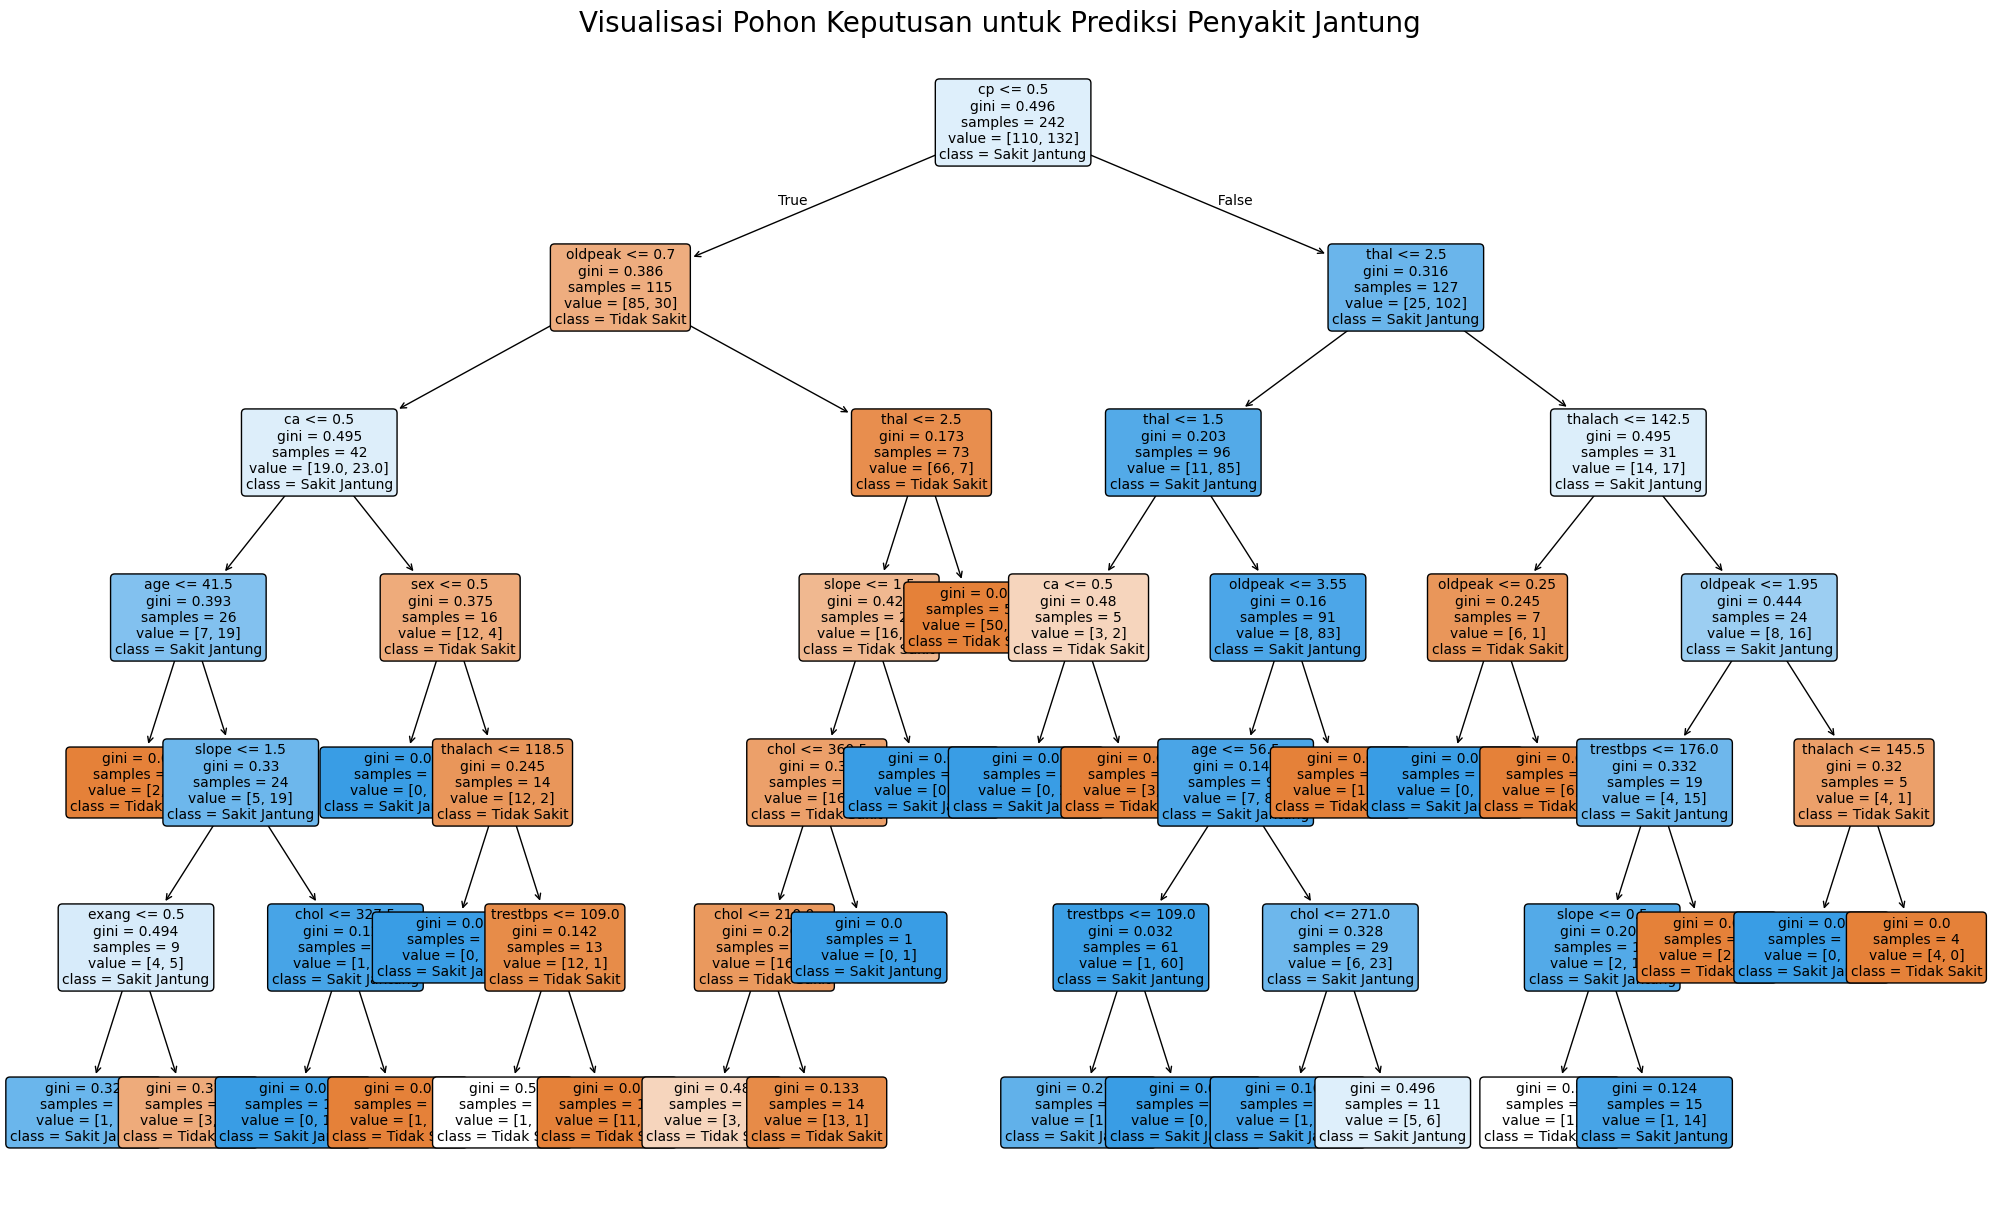

In [ ]:
# Langkah 1: Import semua library yang kita butuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Langkah 2: Muat data langsung dari URL
# pandas bisa langsung membaca file CSV dari internet.
data = pd.read_csv('heart-disease.csv')
df = pd.DataFrame(data)

print("--- Informasi Awal Dataset ---")
print("5 Baris Pertama Data:")
print(df.head())
print("\nInfo Kolom:")
df.info()


x = df.drop('target', axis=1)
y = df['target']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)



# Langkah 5: Buat dan Latih Model Decision Tree
# Kita buat instance dari modelnya. max_depth=5 berarti pohonnya tidak akan
# tumbuh lebih dari 5 tingkat pertanyaan, ini untuk mencegah overfitting.
# random_state=42 agar hasil pohonnya selalu sama setiap kali kode dijalankan.
model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Melatih model dengan data latih. Di sinilah model "belajar" membuat aturan.
model.fit(x_train, y_train)
print("\nModel Decision Tree berhasil dilatih!")


# Langkah 6: Evaluasi Performa Model
# Gunakan model yang sudah dilatih untuk memprediksi data uji
y_pred = model.predict(x_test)

# Cek akurasi tebakan model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model pada data uji: {accuracy * 100:.2f}%")


# Langkah 7: Visualisasikan Pohon Keputusan
# Ini adalah bagian terbaik dari Decision Tree!
print("\nMembuat visualisasi pohon keputusan...")
plt.figure(figsize=(25, 15))  # Membuat kanvas gambar yang besar

# plot_tree adalah fungsi untuk menggambar pohonnya
plot_tree(model,
          feature_names=x.columns,  # Nama fitur untuk ditampilkan di node
          class_names=['Tidak Sakit', 'Sakit Jantung'],  # Nama kelas target
          filled=True,  # Memberi warna pada node
          rounded=True,  # Membuat sudut node lebih bulat
          fontsize=10)

plt.title("Visualisasi Pohon Keputusan untuk Prediksi Penyakit Jantung", fontsize=20)
plt.show()
